<a href="https://colab.research.google.com/github/Nishanth-thiyakarajan/Mobile-Price-Classification/blob/main/Mobile_Price_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Importing the Data

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#Pre-Processing or Encoding the Data

In [4]:
print(train_data.columns.tolist())
print(test_data.columns.tolist())

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


Train data has price column and the test data has id as a column and it is unique. Other than this 2 columns, all the columns and column name are same.

In [5]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Here all the columns has interger and float values. THere is no char values, so no need of typecasting. Also, all Column's type is matching.

In [6]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


There is no Null values present in the columns.

In [7]:
print(train_data.isna().sum())
print(test_data.isna().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


There is no missing values in the columns. So values are present.

In [8]:
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


There is no duplicate values too. So we can proceed with this data.

In [9]:
train_data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [10]:
test_data.describe()

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

#Finding Correlation for the Price Range


In [11]:
price_range_correlation = train_data.corr()['price_range']
price_range_correlation

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [12]:
index_value = price_range_correlation[price_range_correlation<0.02].index
index_value

Index(['clock_speed', 'dual_sim', 'four_g', 'm_dep', 'mobile_wt', 'n_cores',
       'touch_screen', 'wifi'],
      dtype='object')

In [13]:
train_data = train_data.drop(index_value, axis=1)
train_data.head()
test_data = test_data.drop(index_value, axis=1)
test_data.head()

id  battery_power  blue  fc  int_memory  pc  px_height  px_width   ram  \
0   1           1043     1  14           5  16        226      1412  3476   
1   2            841     1   4          61  12        746       857  3895   
2   3           1807     1   1          27   4       1270      1366  2396   
3   4           1546     0  18          25  20        295      1752  3893   
4   5           1434     0  11          49  18        749       810  1773   

   sc_h  sc_w  talk_time  three_g  
0    12     7          2        0  
1     6     0          7        1  
2    17    10         10        0  
3    10     0          7        1  
4    15     8          7        1

Removing the columns that are not related to the Price_rande Column. We have used correaltion for finding the relationship betwwen the other columns with the price range. We are removing the columns that has the correlation value less than 0.02. As It is not contributing for the price Range.


Note:

      [nearby 1 - contribution is higher for the target column]
      [nearby 0 - not contributing to the target column ]
      [nearby -1 - inversional contribution is higher for the target column]

In [14]:
train_data.corr()

battery_power      blue        fc  int_memory        pc  \
battery_power       1.000000  0.011252  0.033334   -0.004004  0.031441   
blue                0.011252  1.000000  0.003593    0.041177 -0.009952   
fc                  0.033334  0.003593  1.000000   -0.029133  0.644595   
int_memory         -0.004004  0.041177 -0.029133    1.000000 -0.033273   
pc                  0.031441 -0.009952  0.644595   -0.033273  1.000000   
px_height           0.014901 -0.006872 -0.009990    0.010441 -0.018465   
px_width           -0.008402 -0.041533 -0.005176   -0.008335  0.004196   
ram                -0.000653  0.026351  0.015099    0.032813  0.028984   
sc_h               -0.029959 -0.002952 -0.011014    0.037771  0.004938   
sc_w               -0.021421  0.000613 -0.012373    0.011731 -0.023819   
talk_time           0.052510  0.013934 -0.006829   -0.002790  0.014657   
three_g             0.011522 -0.030236  0.001793   -0.009366 -0.001322   
price_range         0.200723  0.020573  0.021998    0.044435  0.033599   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
pc             -0.018465  0.004196  0.028984  0.004938 -0.023819   0.014657   
px_height       1.000000  0.510664 -0.020352  0.059615  0.043038  -0.010645   
px_width        0.510664  1.000000  0.004105  0.021599  0.034699   0.006720   
ram            -0.020352  0.004105  1.000000  0.015996  0.035576   0.010820   
sc_h            0.059615  0.021599  0.015996  1.000000  0.506144  -0.017335   
sc_w            0.043038  0.034699  0.035576  0.506144  1.000000  -0.022821   
talk_time      -0.010645  0.006720  0.010820 -0.017335 -0.022821   1.000000   
three_g        -0.031174  0.000350  0.015795  0.012033  0.030941  -0.042688   
price_range     0.148858  0.165818  0.917046  0.022986  0.038711   0.021859   

                three_g  price_range  
battery_power  0.011522     0.200723  
blue          -0.030236     0.020573  
fc             0.001793     0.021998  
int_memory    -0.009366     0.044435  
pc            -0.001322     0.033599  
px_height     -0.031174     0.148858  
px_width       0.000350     0.165818  
ram            0.015795     0.917046  
sc_h           0.012033     0.022986  
sc_w           0.030941     0.038711  
talk_time     -0.042688     0.021859  
three_g        1.000000     0.023611  
price_range    0.023611     1.000000

Now, the irrelavent data is removed and proceeding with the data to train the model.


In [15]:
name = {"three_g":"is3G", "sc_h": "screen_height",
          "sc_w":"screen_width","int_memory":"internal_memory", "pc": "primary_cam_MP",
          "fc": "front_cam_MP", "blue":"has_bluetooth", "m_dep":"mobile_depth"}
train_data.rename(columns = name,inplace=True)
test_data.rename(columns = name,inplace=True)

Renaming all the columns for a better understanding. As Train and Test, both has the calumns, so we have cahnged for both of the dataframes.

In [16]:
train_data.head(2)

battery_power  has_bluetooth  front_cam_MP  internal_memory  \
0            842              0             1                7   
1           1021              1             0               53   

   primary_cam_MP  px_height  px_width   ram  screen_height  screen_width  \
0               2         20       756  2549              9             7   
1               6        905      1988  2631             17             3   

   talk_time  is3G  price_range  
0         19     0            1  
1          7     1            2

In [17]:
test_data.head(2)

id  battery_power  has_bluetooth  front_cam_MP  internal_memory  \
0   1           1043              1            14                5   
1   2            841              1             4               61   

   primary_cam_MP  px_height  px_width   ram  screen_height  screen_width  \
0              16        226      1412  3476             12             7   
1              12        746       857  3895              6             0   

   talk_time  is3G  
0          2     0  
1          7     1

In [18]:
test_data = test_data.set_index('id')
test_data.head(2)

battery_power  has_bluetooth  front_cam_MP  internal_memory  \
id                                                                
1            1043              1            14                5   
2             841              1             4               61   

    primary_cam_MP  px_height  px_width   ram  screen_height  screen_width  \
id                                                                           
1               16        226      1412  3476             12             7   
2               12        746       857  3895              6             0   

    talk_time  is3G  
id                   
1           2     0  
2           7     1

In the Test data, we have encountered that Id is mentioned as a seperate column. so, we have made the id column as a index column to match the columns with train data. Now, train and test data columns are equal in name.

#Observation

Here, we can observe that we need to find the price range. As it is a dependent column in the train data and all other columns are independent. For Machine Learning Model, we need to use a dependent value for prediction and independent values as features that contributing the prediction.



#Visualization

In [19]:
train_data.columns.tolist()

['battery_power',
 'has_bluetooth',
 'front_cam_MP',
 'internal_memory',
 'primary_cam_MP',
 'px_height',
 'px_width',
 'ram',
 'screen_height',
 'screen_width',
 'talk_time',
 'is3G',
 'price_range']

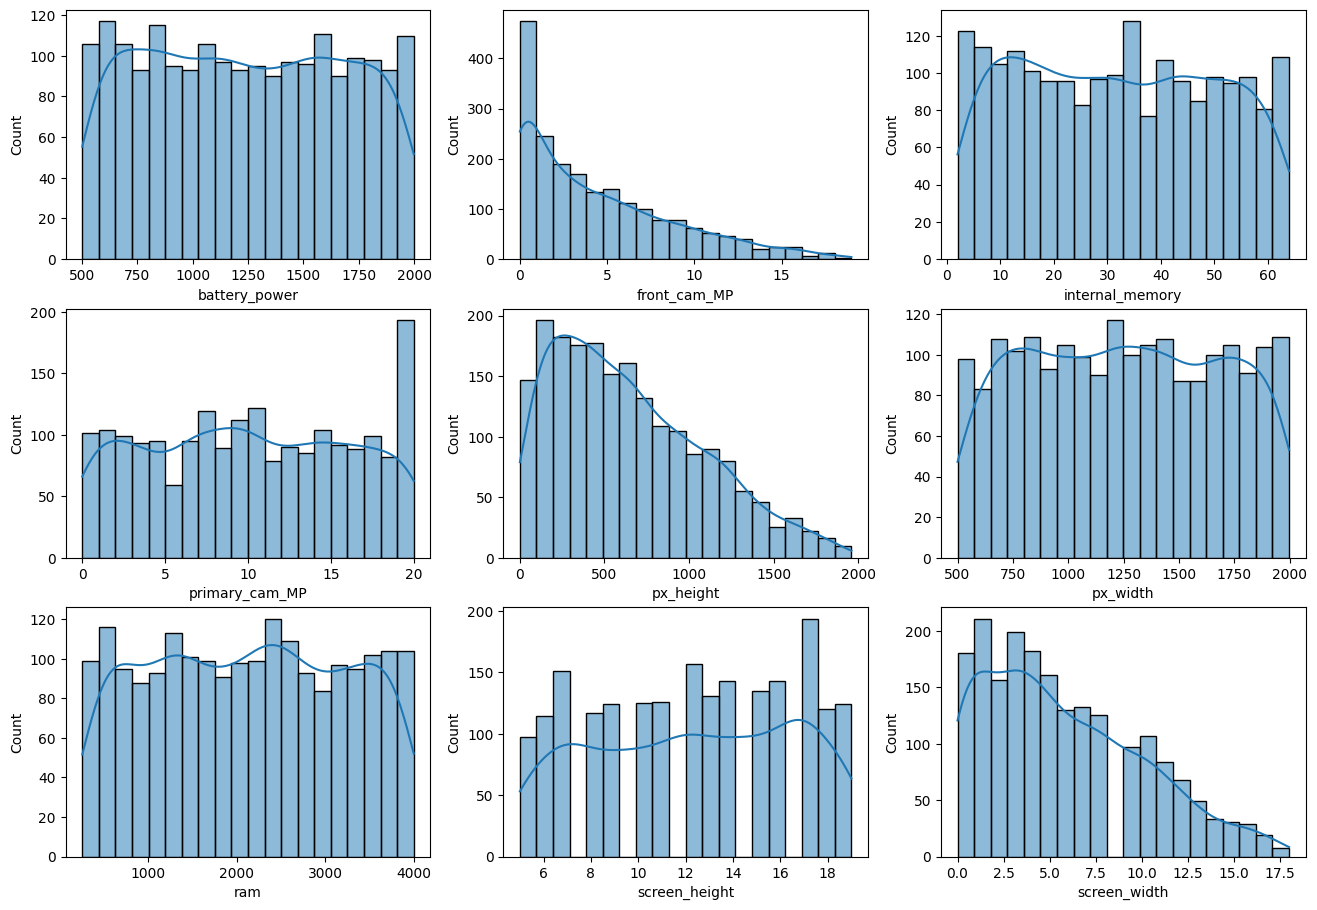

In [20]:
plt.figure(figsize=(16,11))

plt.subplot(3,3,1)
sns.histplot(train_data["battery_power"],kde = True,bins=20)

plt.subplot(3,3,2)
sns.histplot(train_data["front_cam_MP"],kde = True,bins=20)

plt.subplot(3,3,3)
sns.histplot(train_data["internal_memory"],kde = True,bins=20)

plt.subplot(3,3,4)
sns.histplot(train_data["primary_cam_MP"],kde = True,bins=20)

plt.subplot(3,3,5)
sns.histplot(train_data["px_height"],kde = True,bins=20)

plt.subplot(3,3,6)
sns.histplot(train_data["px_width"],kde = True,bins=20)

plt.subplot(3,3,7)
sns.histplot(train_data["ram"],kde = True,bins=20)

plt.subplot(3,3,8)
sns.histplot(train_data["screen_height"],kde = True,bins=20)

plt.subplot(3,3,9)
sns.histplot(train_data["screen_width"],kde = True,bins=20)

plt.show()

<Axes: xlabel='ram', ylabel='px_width'>

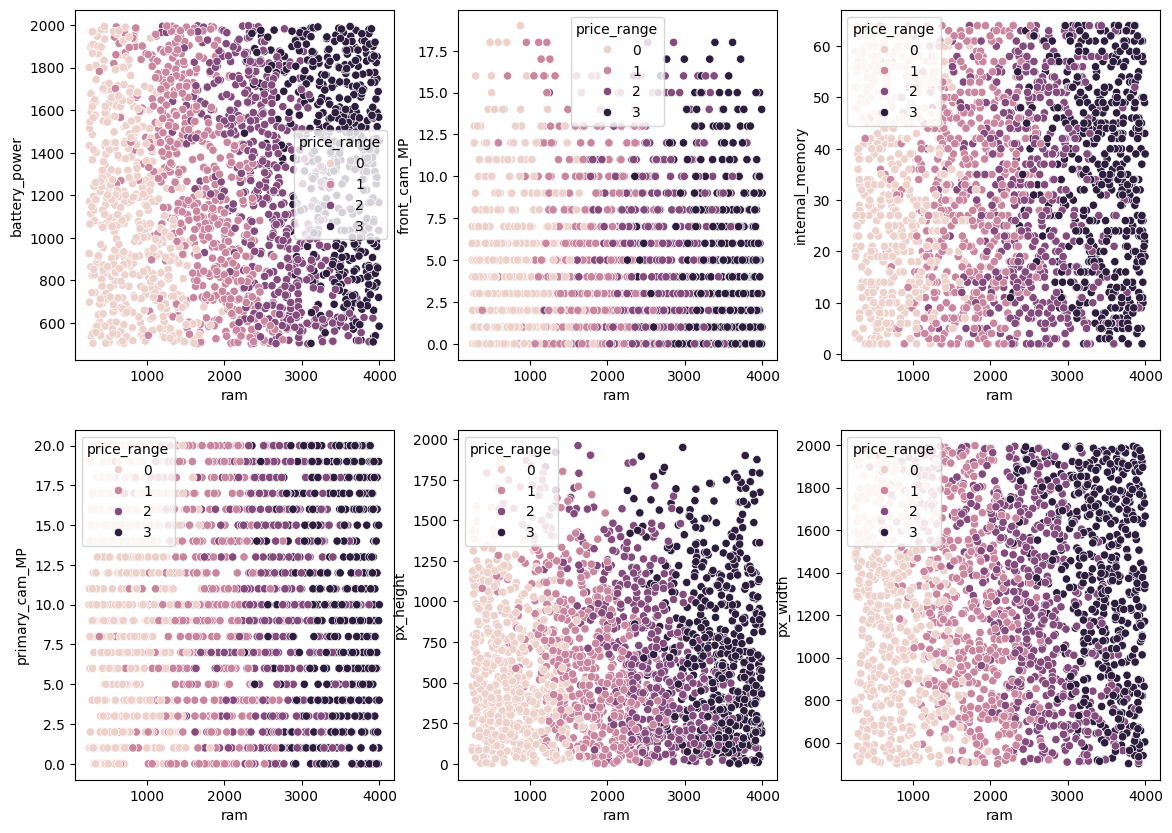

In [21]:
plt.figure(figsize=(14,10))

plt.subplot(2,3,1)
sns.scatterplot(x = "ram" , y ="battery_power",data = train_data,hue= train_data["price_range"])

plt.subplot(2,3,2)
sns.scatterplot(x = "ram" , y ="front_cam_MP",data = train_data,hue= train_data["price_range"])

plt.subplot(2,3,3)
sns.scatterplot(x = "ram" , y ="internal_memory",data = train_data,hue= train_data["price_range"])

plt.subplot(2,3,4)
sns.scatterplot(x = "ram" , y ="primary_cam_MP",data = train_data,hue= train_data["price_range"])

plt.subplot(2,3,5)
sns.scatterplot(x = "ram" , y ="px_height",data = train_data,hue= train_data["price_range"])

plt.subplot(2,3,6)
sns.scatterplot(x = "ram" , y ="px_width",data = train_data,hue= train_data["price_range"])


<Figure size 1200x1200 with 0 Axes>

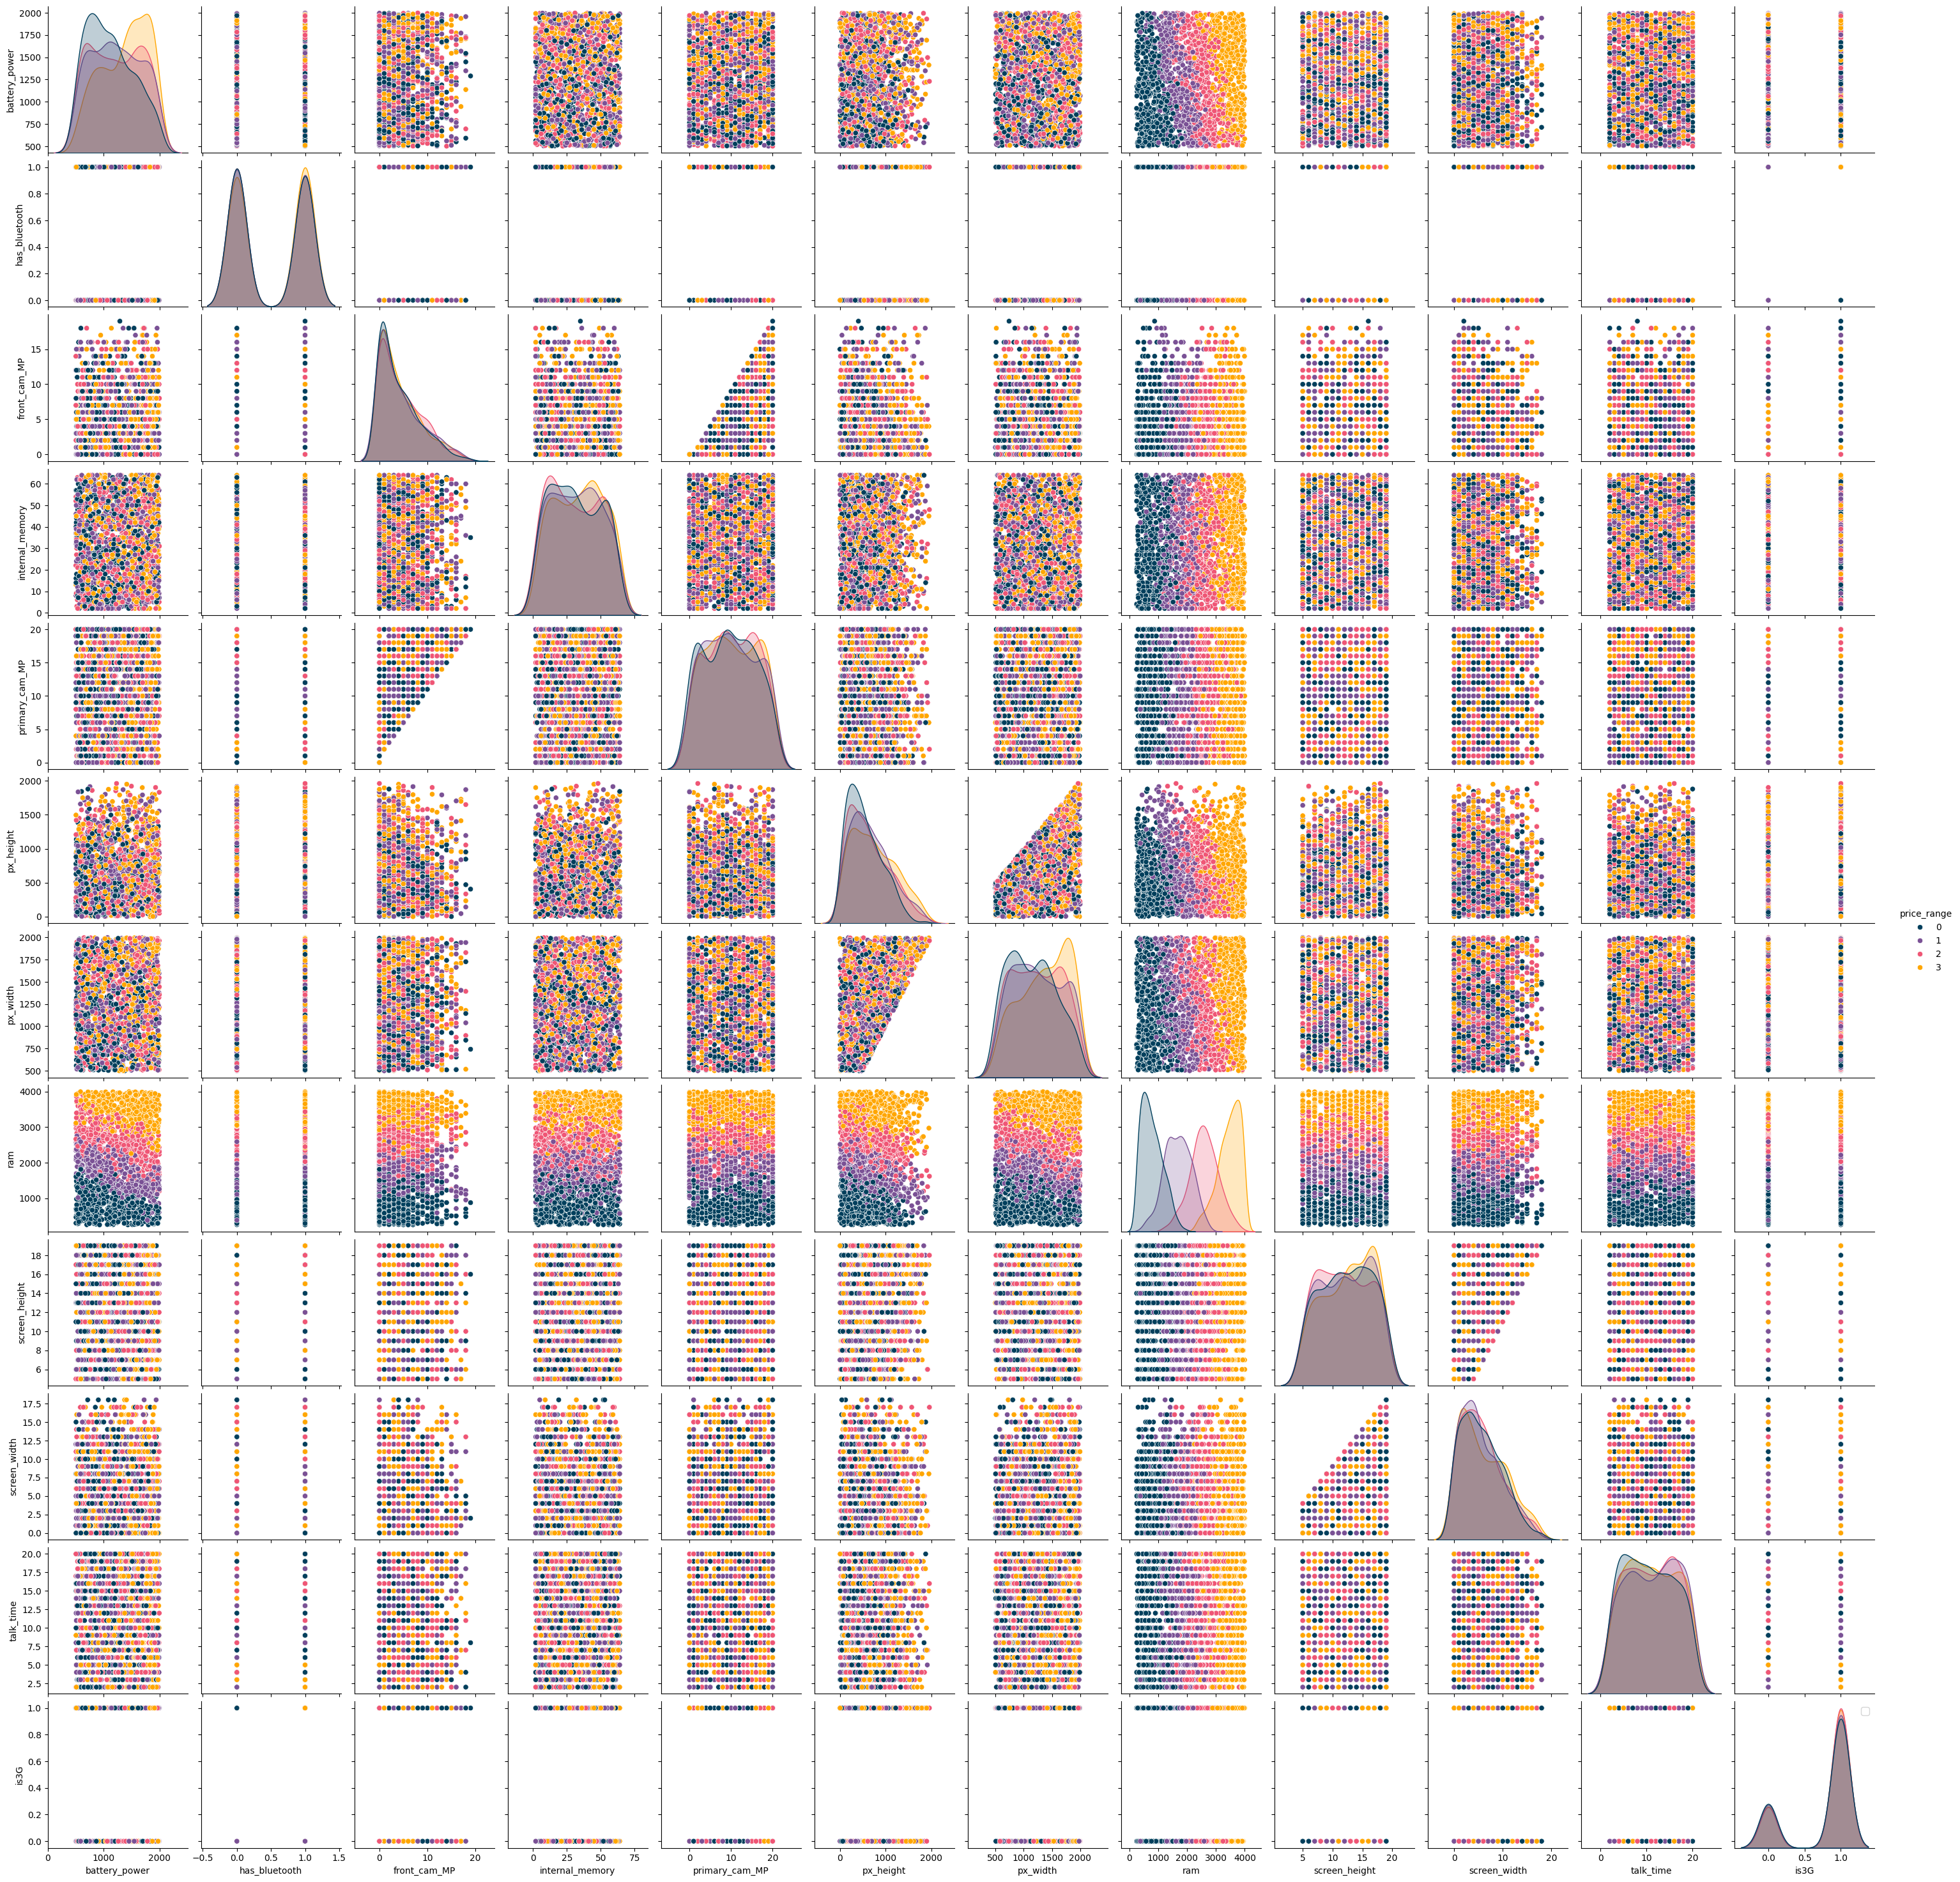

In [22]:
plt.figure(figsize = (12,12))
sns.pairplot(train_data[['battery_power',
 'has_bluetooth',
 'front_cam_MP',
 'internal_memory',
 'primary_cam_MP',
 'px_height',
 'px_width',
 'ram',
 'screen_height',
 'screen_width',
 'talk_time',
 'is3G',
 'price_range']], hue = "price_range", palette = ['#003f5c' ,'#7a5195' ,  '#ef5675', '#ffa600'])

plt.legend(fontsize = 'large')
plt.show()

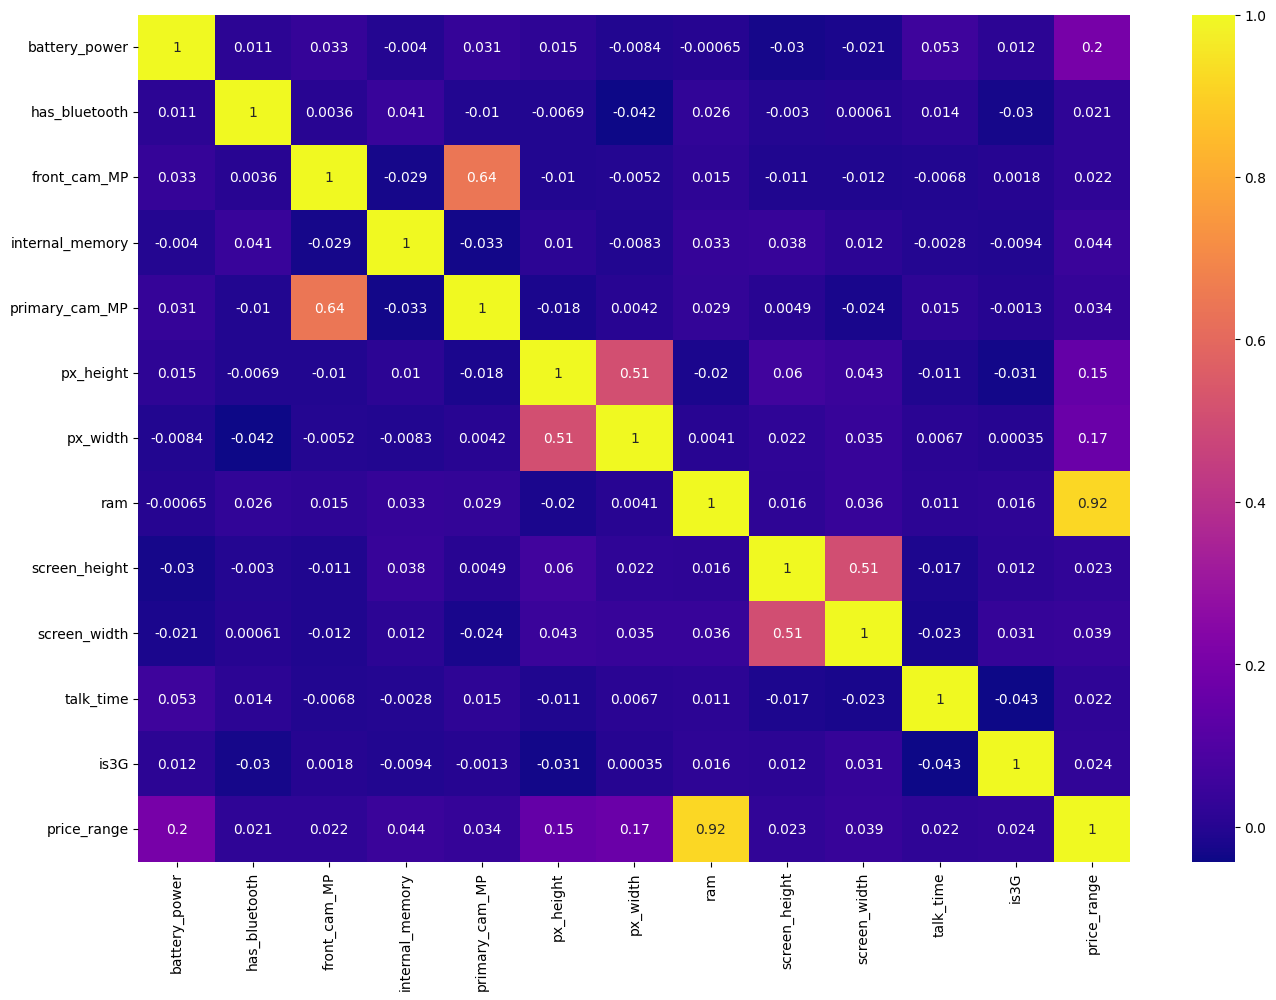

In [23]:
plt.figure(figsize=(16,11))
sns.heatmap(train_data.corr(),annot=True, cmap='plasma')
plt.show()

In [24]:
train_data['price_range'].unique()[0]

1

#ML Model

##Logit Model from Statsmodel

In [25]:
print(train_data['price_range'])

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64


In [26]:
Y_value = train_data["price_range"]
X1_value = train_data[['battery_power',
 'has_bluetooth',
 'front_cam_MP',
 'internal_memory',
 'primary_cam_MP',
 'px_height',
 'px_width',
 'ram',
 'screen_height',
 'screen_width',
 'talk_time',
 'is3G']]

X_train, X_test, y_train, y_test = train_test_split(X1_value, Y_value, test_size=0.2, random_state=0)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

result = sm.MNLogit(y_train, X_train).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.068498
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:            price_range   No. Observations:                 1600
Model:                        MNLogit   Df Residuals:                     1561
Method:                           MLE   Df Model:                           36
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                  0.9506
Time:                        14:24:14   Log-Likelihood:                -109.60
converged:                       True   LL-Null:                       -2217.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
  price_range=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -129.7892     27.984     -4.638      0.000    -184.638     -74.941
battery_power       0.0309      0.007      4.638      0.000       0.018       0.044
has_bluetooth       0.4802      0.793      0.606      0.545      -1.073       2.034
front_cam_MP        0.1805      0.109      1.657      0.098      -0.033       0.394
internal_memory     0.0393      0.024      1.617      0.106      -0.008       0.087
primary_cam_MP     -0.2293      0.107     -2.153      0.031      -0.438      -0.021
px_height           0.0170      0.004      4.750      0.000       0.010       0.024
px_width            0.0187      0.004      4.375      0.000       0.010       0.027
ram                 0.0504      0.011      4.686      0.000       0.029       0.071
screen_height      -0.0778      0.105     -0.740      0.459      -0.284       0.128
screen_width       -0.0040      0.103     -0.039      0.969      -0.206       0.197
talk_time          -0.0642      0.065     -0.985      0.325      -0.192       0.064
is3G               -0.6541      0.973     -0.672      0.501      -2.561       1.253
-----------------------------------------------------------------------------------
  price_range=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -258.2806     34.391     -7.510      0.000    -325.685    -190.876
battery_power       0.0532      0.008      7.072      0.000       0.038       0.068
has_bluetooth       0.8009      1.026      0.781      0.435      -1.210       2.812
front_cam_MP        0.2042      0.145      1.407      0.159      -0.080       0.489
internal_memory     0.0625      0.031      2.049      0.040       0.003       0.122
primary_cam_MP     -0.1100      0.126     -0.875      0.382      -0.357       0.137
px_height           0.0290      0.004      7.063      0.000       0.021       0.037
px_width            0.0323      0.005      6.665      0.000       0.023       0.042
ram                 0.0858      0.012      7.108      0.000       0.062       0.109
screen_height      -0.0495      0.141     -0.351      0.725      -0.325       0.226
screen_width       -0.1305      0.139     -0.940      0.347      -0.403       0.142
talk_time          -0.0413      0.088     -0.468      0.640      -0.214       0.132
is3G               -1.6994      1.350     -1.259      0.208      -4.345       0.947
-----------------------------------------------------------------------------------
  price_range=3       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -407.1163     42.069     -9.677      0.000    -489.569    -324.663
battery_power       0.0734      0.008      8.917      0.000       0.057       0.090
has_bluetooth       0.8161      1.170      0.698      0.485      -1.476       3.108
front_cam_MP        0.2809      0.169      1.660 

###Accuracy


In [27]:
y_pred = round(result.predict(X_test))
y_pred


0    1    2    3
405   0.0  0.0  0.0  1.0
1190  1.0  0.0  0.0  0.0
1132  0.0  0.0  1.0  0.0
731   0.0  0.0  1.0  0.0
1754  0.0  0.0  1.0  0.0
...   ...  ...  ...  ...
638   0.0  1.0  0.0  0.0
360   0.0  1.0  0.0  0.0
1810  1.0  0.0  0.0  0.0
1743  0.0  0.0  0.0  1.0
563   1.0  0.0  0.0  0.0

[400 rows x 4 columns]

In [28]:
value = 1

def find_col_index(row, value):
    col_index = row.index[row == value].tolist()
    return col_index[0] if col_index else None

col_index = (y_pred.apply(lambda row: find_col_index(row, value), axis=1)).tolist()
y_test_val = y_test.tolist()
p=0

for i in range(0,200):
    if(col_index[i] == y_test_val[i]):
        p+=1

print("Accuracy: ",(p/200)*100)

Accuracy:  95.5


Predicting the Value for the Test Dataset.


In [29]:
prediction = test_data[['battery_power',
                    'has_bluetooth',
                    'front_cam_MP',
                    'internal_memory',
                    'primary_cam_MP',
                    'px_height',
                    'px_width',
                    'ram',
                    'screen_height',
                    'screen_width',
                    'talk_time',
                    'is3G']]

prediction = sm.add_constant(prediction)

predicted = result.predict(prediction)
predicted_price_range = predicted.idxmax(axis=1)

test_data['predicted_price_range'] = predicted_price_range
test_data['predicted_price_range']

test_data.to_csv('test_data_with_predictions.csv', index=False)

##Sequential from Keras

In [ ]:
Y_value = train_data["price_range"]
X1_value = train_data[['battery_power',
 'has_bluetooth',
 'front_cam_MP',
 'internal_memory',
 'primary_cam_MP',
 'px_height',
 'px_width',
 'ram',
 'screen_height',
 'screen_width',
 'talk_time',
 'is3G']]

In [31]:
Y_value.unique()

array([1, 2, 3, 0])

One-Hot Encoding

In [34]:
from keras.utils import to_categorical
Y_value = to_categorical(Y_value)
Y_value

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X1_value, Y_value, test_size=0.2, random_state=0)

In [36]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 296 (1.16 KB)

 Trainable params: 296 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

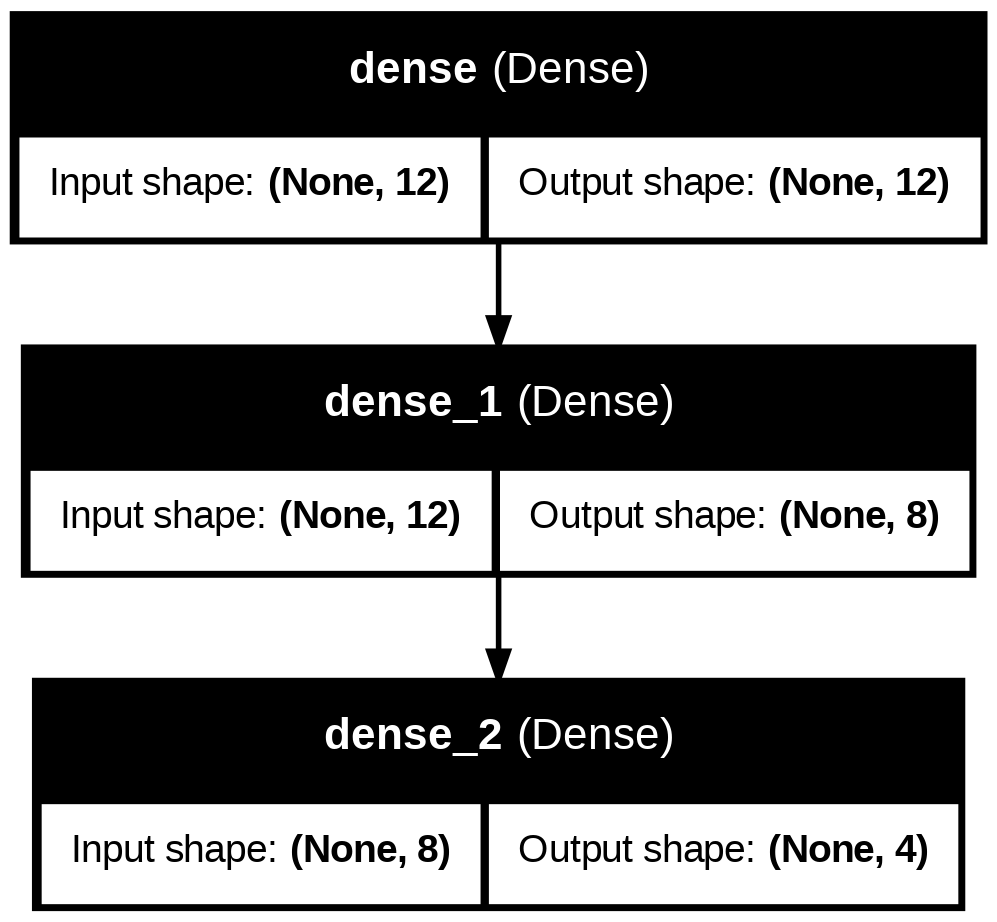

In [39]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [40]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1495 - loss: 319.7714
Epoch 2/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2312 - loss: 21.3605
Epoch 3/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3341 - loss: 6.0367
Epoch 4/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4351 - loss: 2.7407
Epoch 5/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4595 - loss: 2.2669
Epoch 6/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4715 - loss: 2.0493
Epoch 7/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4625 - loss: 1.8340
Epoch 8/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4831 - loss: 1.6345
Epoch 9/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5024 - loss: 1.6173
Epoch 10/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4815 - loss: 1.4906
Epoch 11/150
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5262 - loss: 1.2269
Epoch 12/150
160/160 ━━━━━━━━━━━━━━━━━

In [41]:
model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[1.24711988e-07, 1.40315192e-02, 2.31923059e-01, 7.54045188e-01],
       [8.99303555e-01, 1.00256599e-01, 4.35260008e-04, 4.65660560e-06],
       [4.19623044e-04, 2.74511248e-01, 5.66011071e-01, 1.59058064e-01],
       ...,
       [9.82851446e-01, 1.69959683e-02, 1.52048815e-04, 4.43285103e-07],
       [1.68189144e-05, 1.15571454e-01, 4.38864201e-01, 4.45547491e-01],
       [6.74754754e-02, 7.45013416e-01, 1.79725707e-01, 7.78530072e-03]],
      dtype=float32)

In [43]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7338 - loss: 0.5923 


[0.5882034301757812, 0.7350000143051147]